In [205]:
import h5py
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
import matplotlib.patches as pt
import utility_functions
import meshio
import evaluations


In [206]:
point = np.array([119.7987347,  90.18871387])

start = 0
end = 10000
start_mlda = 0
end_mlda = 10000

sample_paths = [
    '/home/anne/Masterarbeit/masterarbeit/results/samples_2d_test_l0.h5',
    '/home/anne/Masterarbeit/masterarbeit/results/samples_2d_test_l1.h5',
    '/home/anne/Masterarbeit/masterarbeit/results/samples_2d_test_l2.h5']

samples = []

for i in range(len(sample_paths)):
    fin = h5py.File(sample_paths[i])
    samples.append(np.array( fin['/samples'][0:2] ))
    fin.close()

fin = h5py.File('/home/anne/Masterarbeit/masterarbeit/results/samples_2d_test_mlda.h5')
mlda_samples = np.array( fin['/samples'][0:2] )
fin.close()


In [207]:
for i in range(len(sample_paths)):
    s = samples[i]
    az.plot_trace(s[0,start:end])
    az.plot_trace(s[1,start:end])

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'x'}>]], dtype=object)

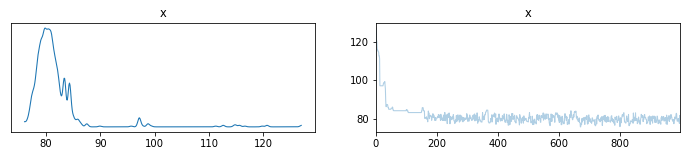

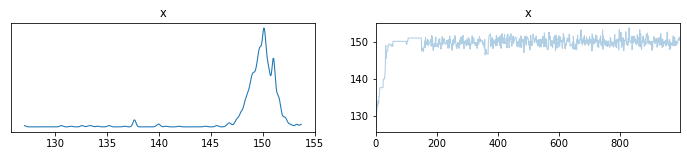

In [ ]:
az.plot_trace(mlda_samples[0,start_mlda:])
az.plot_trace(mlda_samples[1,start_mlda:])

In [ ]:
for i in range(len(sample_paths)):
    print("Level " + str(i) + ":")
    mean = np.mean(samples[i][:,start:end], axis=1)
    print("Mean = " + str(mean))
    #var = np.var(samples[i][:,start:end], axis=1)/end
    #print("Variance = " + str(var))
    print("DLE = "+ str(np.linalg.norm(mean-point)))
    print("\n")


print("MLDA :")
mean = np.mean(mlda_samples[:,start_mlda:end_mlda], axis=1)
print("Mean = " + str(mean))
print("DLE = "+ str(np.linalg.norm(mean-point)))


Level 0:
Mean = [119.43485298  92.43872291]
DLE = 2.2792434239787083


Level 1:
Mean = [119.92609257  91.22260443]
DLE = 1.041705195913048


Level 2:
Mean = [119.8855284   90.63339236]
DLE = 0.45306965075082173


MLDA :
Mean = [ 81.47965086 149.51259101]
DLE = 70.623470495854


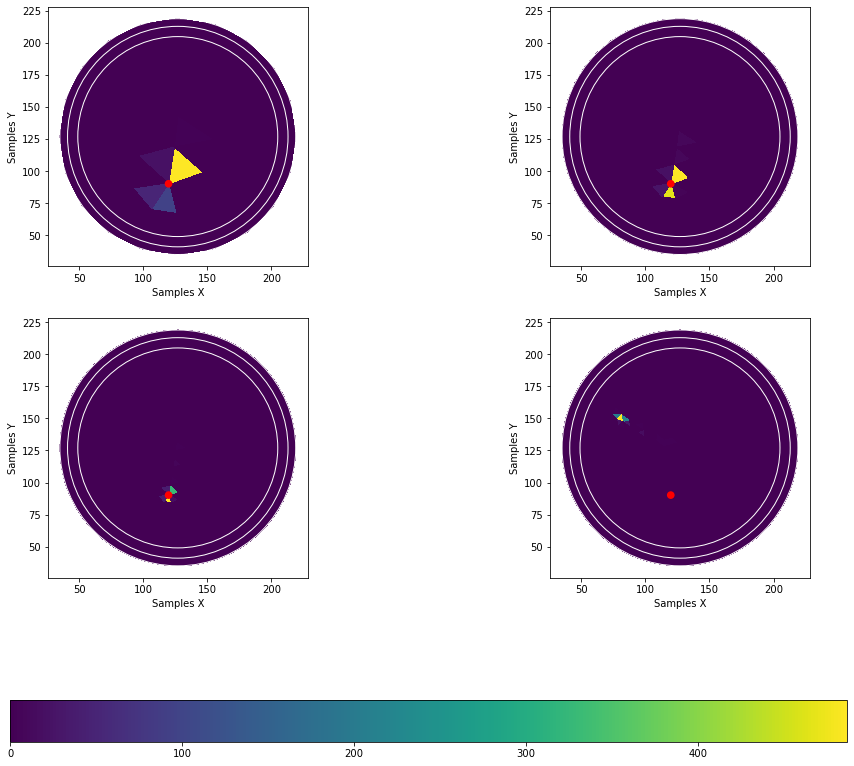

In [ ]:
path_meshs = [
        "data/mesh_30_1.msh",
        "data/mesh_30_2.msh",
        "data/mesh_30_3.msh"]

fig, ax = plt.subplots(2, 2, figsize=(15,15))
fig.subplots_adjust(wspace=.5)

im = evaluations.draw_cells(path_meshs[0],samples[0][:,start:end],ax[0,0])
im = evaluations.draw_cells(path_meshs[1],samples[1][:,start:end],ax[0,1])
im = evaluations.draw_cells(path_meshs[2],samples[2][:,start:end],ax[1,0])
im = evaluations.draw_cells(path_meshs[2],mlda_samples[:,start_mlda:end_mlda],ax[1,1])

evaluations.set_ax(ax[0,0],point)
evaluations.set_ax(ax[0,1],point)
evaluations.set_ax(ax[1,0],point)
evaluations.set_ax(ax[1,1],point)

fig.colorbar(im, ax=ax.ravel().tolist(),orientation="horizontal")


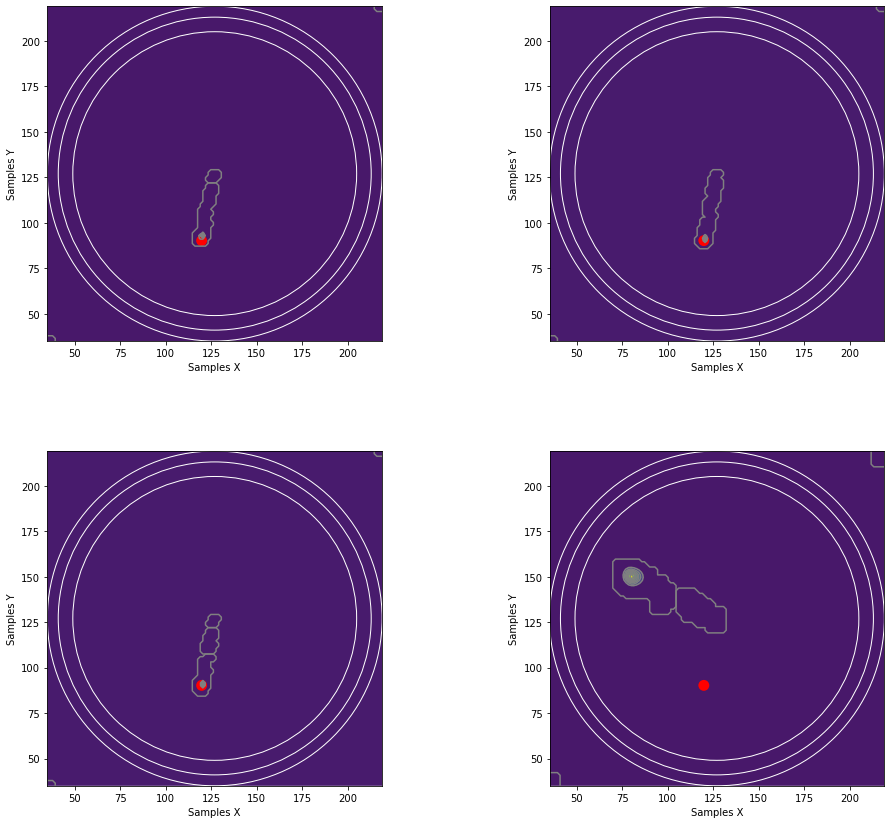

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15,15))
fig.subplots_adjust(wspace=.5)

im = evaluations.draw_densities(samples[0][:,start:end],ax[0,0])
im = evaluations.draw_densities(samples[1][:,start:end],ax[0,1])
im = evaluations.draw_densities(samples[2][:,start:end],ax[1,0])
im = evaluations.draw_densities(mlda_samples[:,start_mlda:end_mlda],ax[1,1])

#point = (80,150)
evaluations.set_ax(ax[0,0],point)
evaluations.set_ax(ax[0,1],point)
evaluations.set_ax(ax[1,0],point)
evaluations.set_ax(ax[1,1],point)

#fig.colorbar(im, ax=ax.ravel().tolist(),orientation="horizontal")
